## Data Exploration

### The Summary Insights of Data Exploration

1. A repitive pattern exists from 7 14 and 30 days
2. 60% of data in training set are reordered
3. The diary products have a very high reorder rate
4. The first order tend to have a very high reorder rate
5. The early morning and evening have a very high reorder rate


In [2]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color=sns.color_palette()
% matplotlib inline
pd.options.mode.chained_assignment = None

In [3]:
# import the datasets
order_products_train_df = pd.read_csv("../DataArtist/instacart/order_products__train.csv")
order_products_prior_df = pd.read_csv("../DataArtist/instacart/order_products__prior.csv")
orders_df = pd.read_csv("../DataArtist/instacart/orders.csv")
products_df = pd.read_csv("../DataArtist/instacart/products.csv")
aisles_df = pd.read_csv("../DataArtist/instacart/aisles.csv")
departments_df = pd.read_csv("../DataArtist/instacart/departments.csv")

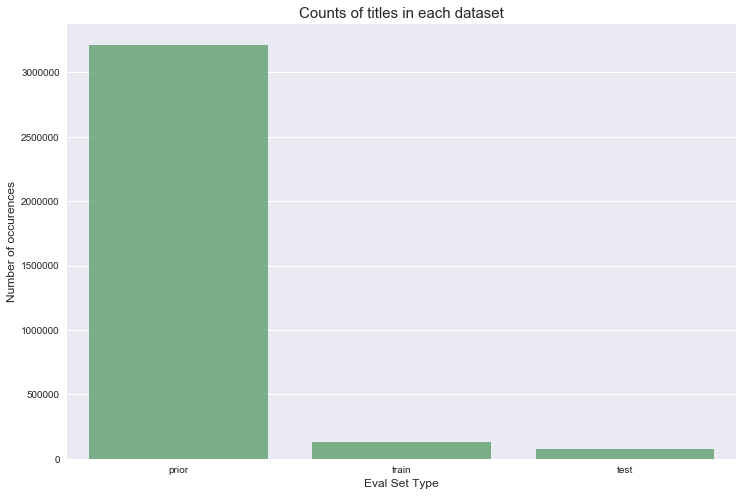

In [4]:
# count the rows in each of three datasets
cnt_srs=orders_df.eval_set.value_counts()
plt.figure(figsize=(12,8))
# make a barplot to see the counts
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8,color=color[1])
plt.xlabel("Eval Set Type",fontsize=12)
plt.ylabel("Number of occurences",fontsize=12)
plt.title("Counts of titles in each dataset",fontsize=15)


In [5]:
def get_unique_count(x):
    return len(np.unique(x))

cnt_srs=orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

Altogether 206209 users in total

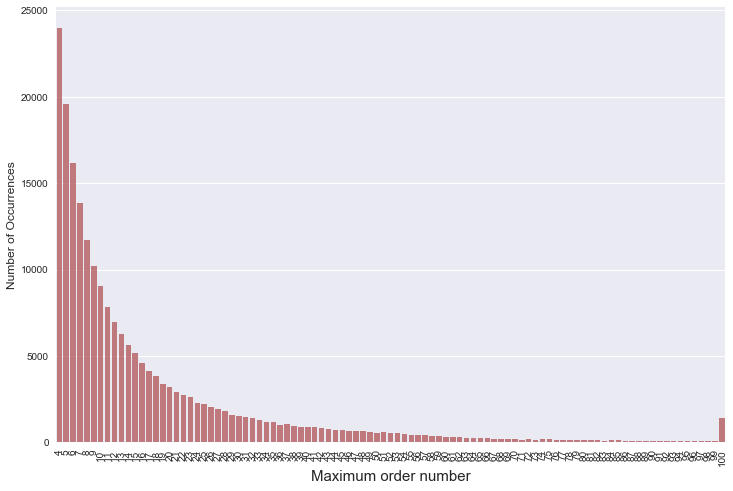

In [6]:
cnt_srs=orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs=cnt_srs.order_number.value_counts()
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8,color=color[2])
plt.ylabel("Number of Occurrences",fontsize=12)
plt.xlabel("Maximum order number",fontsize=15)
plt.xticks(rotation="vertical")
plt.show()

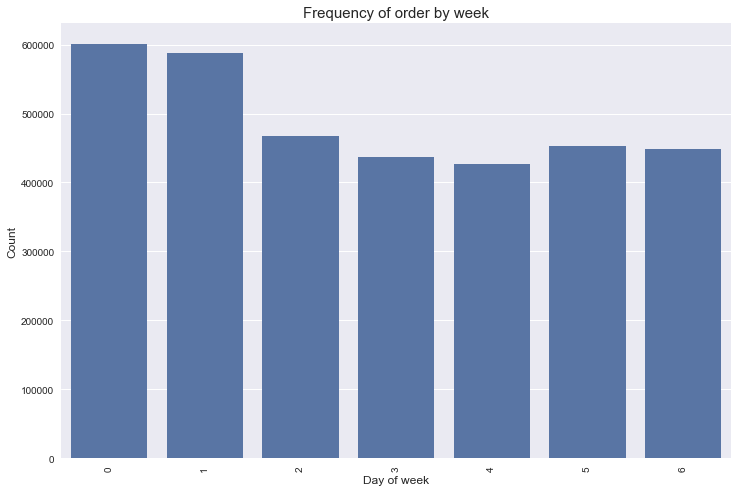

In [7]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow",data=orders_df,color=color[0])
plt.ylabel("Count",fontsize=12)
plt.xlabel("Day of week",fontsize=12)
plt.xticks(rotation="vertical")
plt.title("Frequency of order by week",fontsize=15)

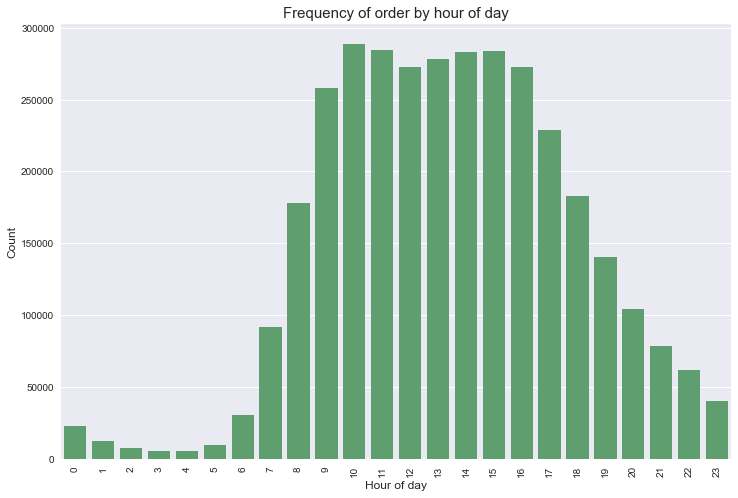

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

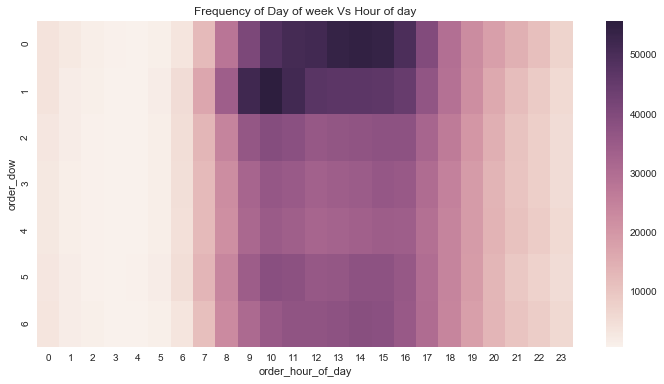

In [9]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

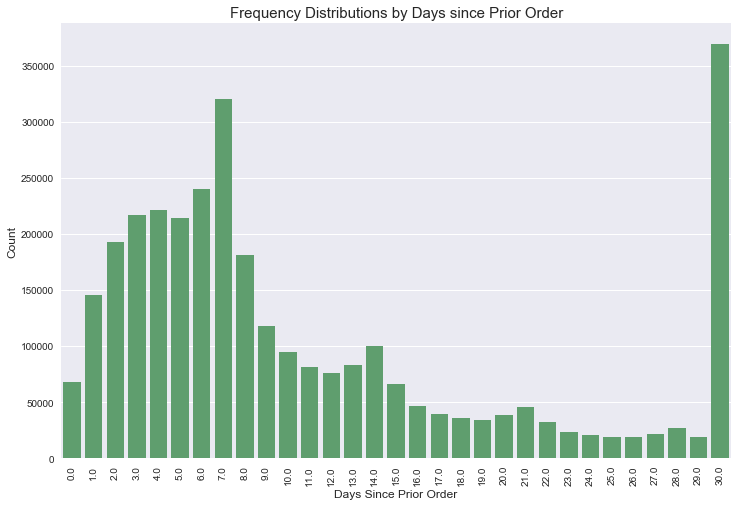

In [10]:
# check the time interval between the orders
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days Since Prior Order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency Distributions by Days since Prior Order", fontsize=15)
plt.show()

reorder every 7 days, 14 days and 30 days

In [11]:
# precentage of reorder in prior sets
order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]

0.5904594330400782

In [12]:
# precentage of reorder in training sets
order_products_train_df.reordered.sum() / order_products_train_df.shape[0]

0.59859441275096292

on average, about 59% of are reordered products

In [13]:
# check out the situations when none of the products are reordered

In [14]:
# choose the reordered column groupby order id
grouped_df=order_products_prior_df.groupby("order_id")["reordered"]
# calculate the reordered values of every group
grouped_df=grouped_df.aggregate("sum").reset_index()
grouped_df["reordered"].ix[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts()/ grouped_df.shape[0]

1    0.879472
0    0.120528
Name: reordered, dtype: float64

about 12% percent of orders in prior order has no reorder rate

In [15]:
# choose the reordered column groupby order id
grouped_df=order_products_train_df.groupby("order_id")["reordered"]
# calculate the reordered values of every group
grouped_df=grouped_df.aggregate("sum").reset_index()
grouped_df["reordered"].ix[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts()/ grouped_df.shape[0]

1    0.93444
0    0.06556
Name: reordered, dtype: float64

about 6.5% percent of orders in prior order has no reorder rate

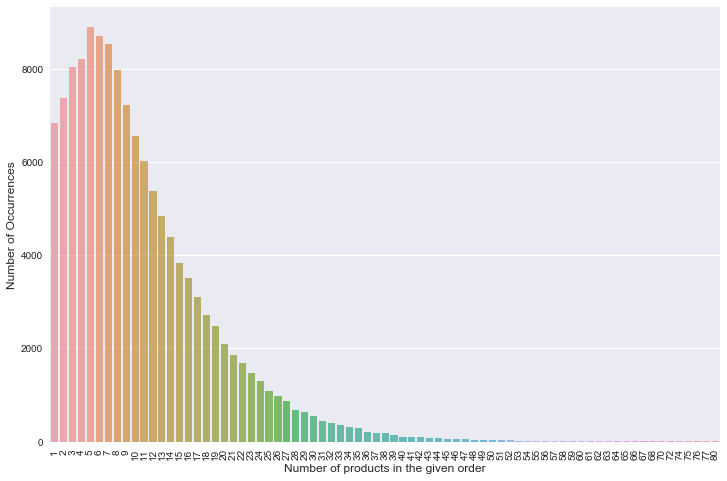

In [16]:
# check the number of products in each order
grouped_df=order_products_train_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped_df.head()
cnt_srs=grouped_df.add_to_cart_order.value_counts()


plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [17]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [18]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [19]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [20]:
# merge products details with the order prior details

In [21]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [22]:
# check the product name and its frequency
cnt_srs=order_products_prior_df['product_name'].value_counts().reset_index().head()
cnt_srs.columns=['product name','frequency or count']
cnt_srs

,product name,frequency or count
0,Banana,15450
1,Bag of Organic Bananas,12409
2,Organic Strawberries,8528
3,Organic Baby Spinach,7852
4,Organic Hass Avocado,6857


Most of them are organic fruits

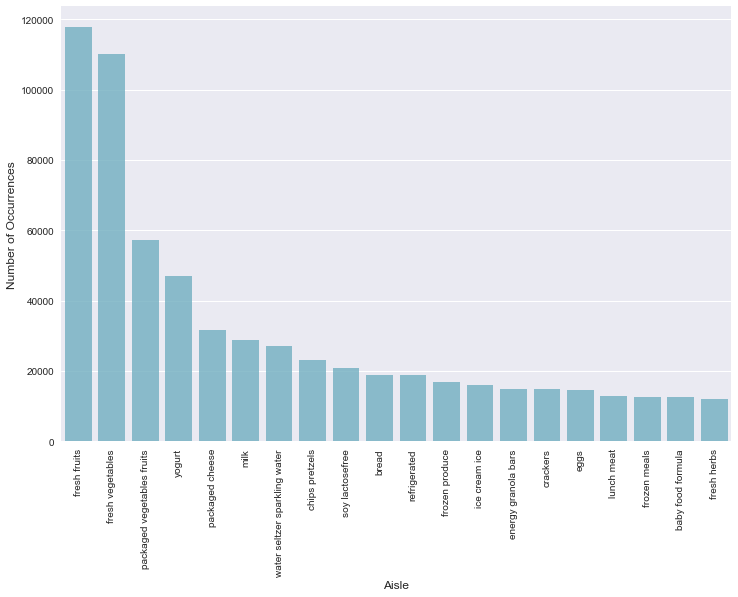

In [23]:
# Find top two important aisles
cnt_srs=order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8,color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation="vertical")
plt.show()

The top two items are fresh fruits and vegetables

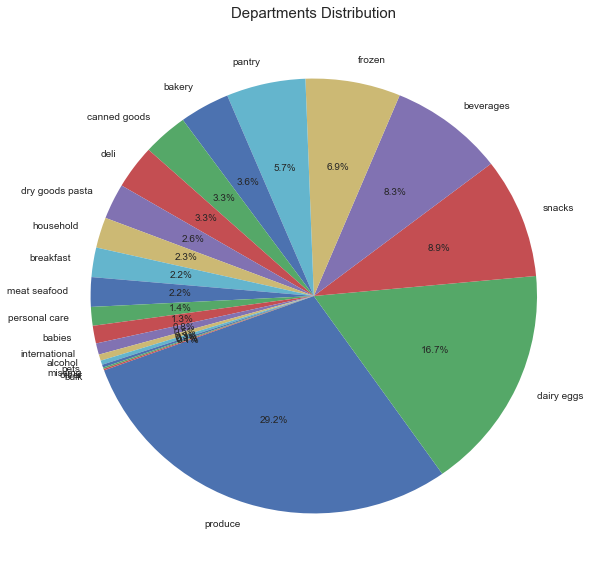

In [24]:
# check the departement distribution
plt.figure(figsize=(10,10))
temp_series=order_products_prior_df['department'].value_counts()
labels=np.array(temp_series.index)
sizes=np.array((temp_series/temp_series.sum())*100)
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=200)
plt.title("Departments Distribution",fontsize=15)
plt.show()

The top two departments are prouce and dairy eggs

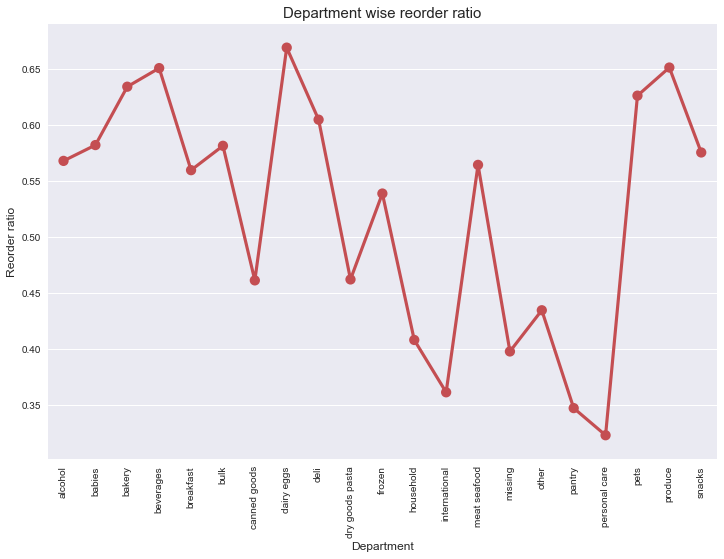

In [25]:
# Analyze the department wise reorder ratio
grouped_df=order_products_prior_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['department'].values,grouped_df['reordered'].values,alpha=0.8,color=color[2])
plt.ylabel("Reorder ratio",fontsize=12)
plt.xlabel("Department",fontsize=12)
plt.xticks(rotation="vertical")
plt.title("Department wise reorder ratio",fontsize=15)
plt.show()


Personal care has lowest reorder ration and dairy egge has highest reorderd ratio

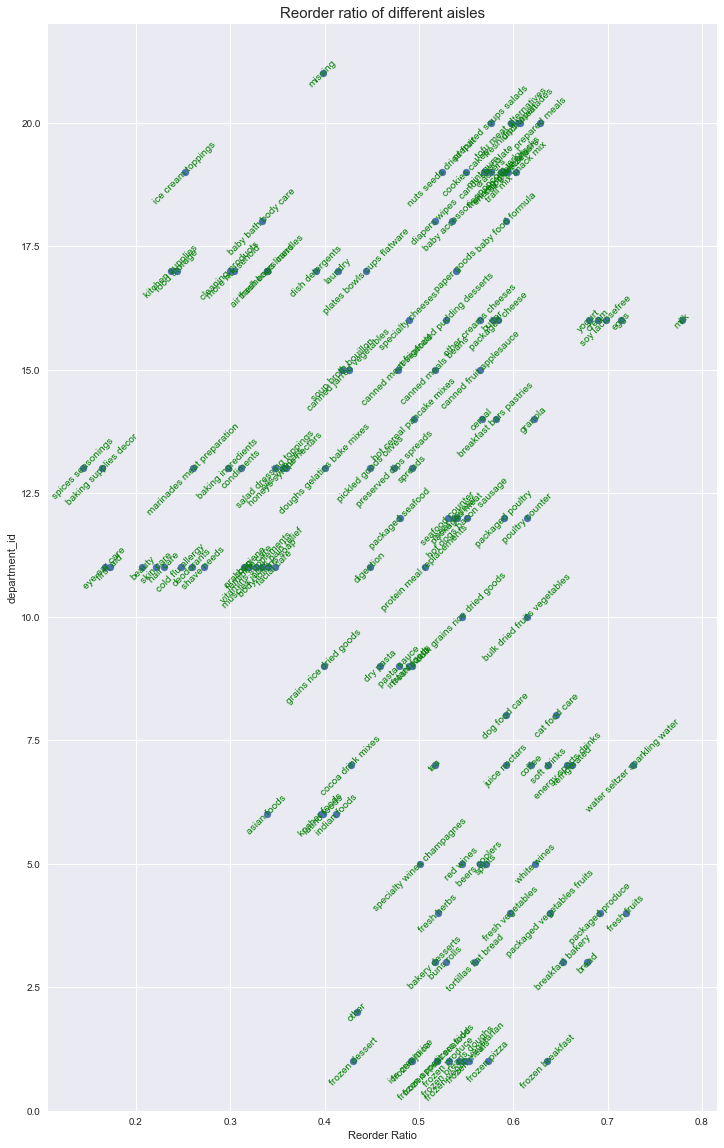

In [26]:
# check the aisle reorder ratio
grouped_df=order_products_prior_df.groupby(["department_id","aisle"])["reordered"].aggregate("mean").reset_index()
fig,ax=plt.subplots(figsize=(12,20))
ax.scatter(grouped_df.reordered.values, grouped_df.department_id.values)
for i, txt in enumerate(grouped_df.aisle.values):
    ax.annotate(txt, (grouped_df.reordered.values[i], grouped_df.department_id.values[i]), rotation=45, ha='center', va='center', color='green')
plt.xlabel('Reorder Ratio')
plt.ylabel('department_id')
plt.title("Reorder ratio of different aisles", fontsize=15)
plt.show()

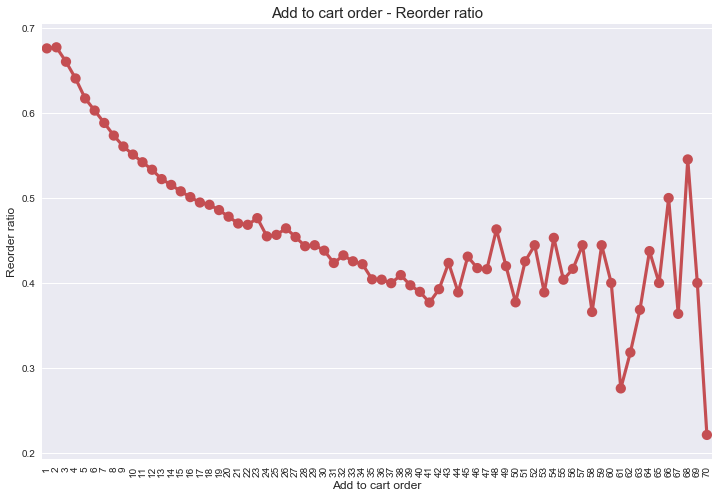

In [27]:
# how order of adding the product to the cart affects the reorder ratio
order_products_prior_df["add_to_cart_order_mod"]=order_products_prior_df["add_to_cart_order"].copy()
order_products_prior_df["add_to_cart_order_mod"].ix[order_products_prior_df["add_to_cart_order_mod"]>70] = 70
grouped_df = order_products_prior_df.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

People tend to reorder those things first put into the cart

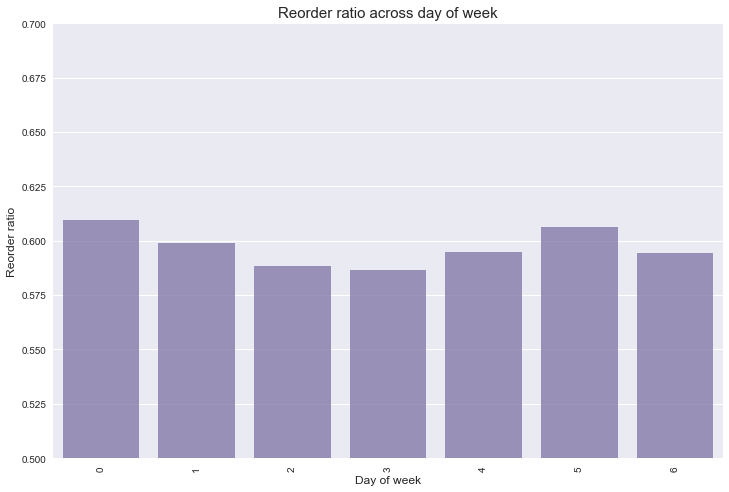

In [31]:
# check the reorder ratio by time-based variables
order_products_train_df = pd.merge(order_products_train_df, orders_df, on='order_id', how='left')
grouped_df = order_products_train_df.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_dow'].values, grouped_df['reordered'].values, alpha=0.8, color=color[3])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder ratio across day of week", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()


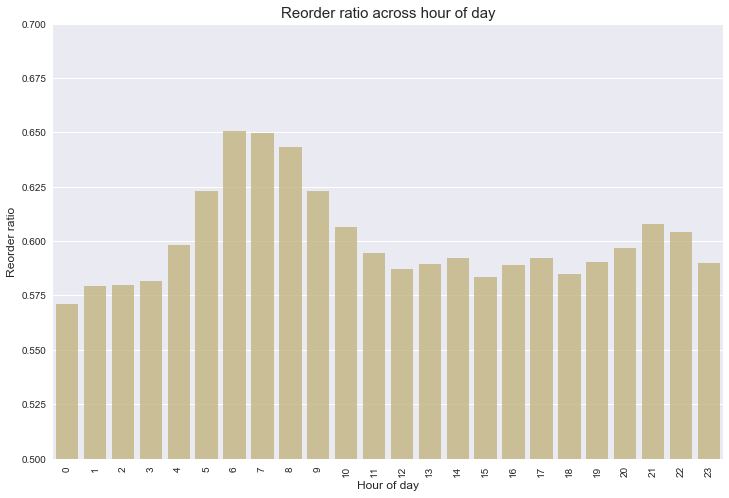

In [32]:
grouped_df = order_products_train_df.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_hour_of_day'].values, grouped_df['reordered'].values, alpha=0.8, color=color[4])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder ratio across hour of day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

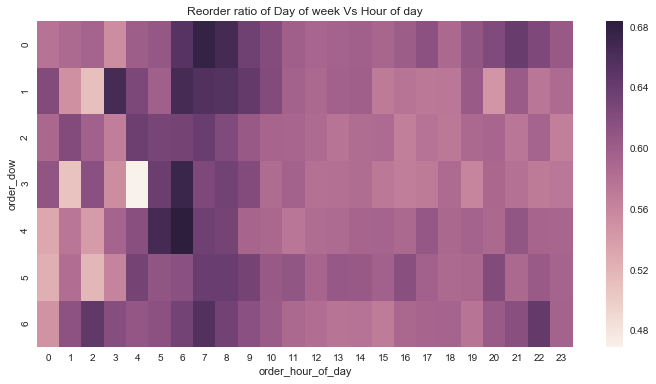

In [34]:
grouped_df = order_products_train_df.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()